# Scraping Images

## Introduction

You've definitely started to hone your skills at scraping now! With that, let's look at another data format you're apt to want to pull from the web: images! In this lesson, you'll see how to save images from the web as well as display them in a pandas DataFrame for easy perusal!

## Objectives

You will be able to:

* Save Images from the Web
* Display Images in a Pandas DataFrame

## Grabbing an HTML Page

Start with the same page that you've been working with: books.toscrape.com.

<img src="images/book-section.png">

In [1]:
from bs4 import BeautifulSoup
import requests

In [3]:
html_page = requests.get('http://books.toscrape.com/') #Make a get request to retrieve the page
soup = BeautifulSoup(html_page.content, 'html.parser') #Pass the page contents to beautiful soup for parsing
warning = soup.find('div', class_="alert alert-warning")
book_container = warning.nextSibling.nextSibling

In [4]:
book_container

<div>
<ol class="row">
<li class="col-xs-6 col-sm-4 col-md-3 col-lg-3">
<article class="product_pod">
<div class="image_container">
<a href="catalogue/a-light-in-the-attic_1000/index.html"><img alt="A Light in the Attic" class="thumbnail" src="media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"/></a>
</div>
<p class="star-rating Three">
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
</p>
<h3><a href="catalogue/a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a></h3>
<div class="product_price">
<p class="price_color">£51.77</p>
<p class="instock availability">
<i class="icon-ok"></i>
    
        In stock
    
</p>
<form>
<button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>
</form>
</div>
</article>
</li>
<li class="col-xs-6 col-sm-4 col-md-3 col-lg-3">
<article class="product_pod">
<div class="image_containe

## Finding Images

First, simply retrieve a list of images by searching for `img` tags with beautiful soup:

In [5]:
images = book_container.findAll('img')
ex_img = images[0] #Preview an entry
ex_img

<img alt="A Light in the Attic" class="thumbnail" src="media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"/>

In [6]:
#Use tab complete to preview what types of methods are available for the entry
ex_img.

[]

In [7]:
#While there's plenty of other methods to explore, simply select the url for the image for now.
ex_img.attrs['src']

'media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg'

## Saving Images

Great! Now that you have a url (well, a url extension to be more precise) you can download the image locally!

In [8]:
import shutil

In [9]:
url_base = "http://books.toscrape.com/"
url_ext = ex_img.attrs['src']
full_url = url_base + url_ext
r = requests.get(full_url, stream=True)
if r.status_code == 200:
    with open("images/book1.jpg", 'wb') as f:
        r.raw.decode_content = True
        shutil.copyfileobj(r.raw, f)

## Showing Images in the File Directory

You can also run a simple bash command in a standalone cell to preview that the image is indeed there:

In [10]:
ls images/

book10.jpg  book14.jpg  book18.jpg  book2.jpg  book6.jpg  book-section.png
book11.jpg  book15.jpg  book19.jpg  book3.jpg  book7.jpg
book12.jpg  book16.jpg  book1.jpg   book4.jpg  book8.jpg
book13.jpg  book17.jpg  book20.jpg  book5.jpg  book9.jpg


## Previewing an Individual Image

In [16]:
!pip install pillow

    100% |████████████████████████████████| 2.1MB 15.4MB/s ta 0:00:01
You are using pip version 10.0.1, however version 19.2.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [17]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import PIL

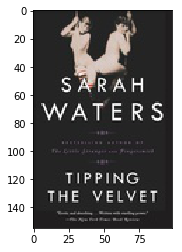

In [19]:
img=mpimg.imread('images/book2.jpg')
imgplot = plt.imshow(img)
plt.show()

## Displaying Images in Pandas DataFrames

You can even display images within a pandas DataFrame by using a little HTML yourself!

In [16]:
import pandas as pd
from IPython.display import Image, HTML

In [18]:
row1 = [ex_img.attrs['alt'], '<img src="images/book1.jpg"/>']
df = pd.DataFrame(row1).transpose()
df.columns = ['title', 'cover']
HTML(df.to_html(escape=False))

,title,cover
0,A Light in the Attic,


## All Together Now

In [22]:
data = []
for n, img in enumerate(images):
    url_base = "http://books.toscrape.com/"
    url_ext = img.attrs['src']
    full_url = url_base + url_ext
    r = requests.get(full_url, stream=True)
    path = "images/book{}.jpg".format(n+1)
    title = img.attrs['alt']
    if r.status_code == 200:
        with open(path, 'wb') as f:
            r.raw.decode_content = True
            shutil.copyfileobj(r.raw, f)
        row = [title, '<img src="{}"/>'.format(path)]
        data.append(row)
df = pd.DataFrame(data)
print('Number of rows: ', len(df))
df.columns = ['title', 'cover']
HTML(df.to_html(escape=False))   

Number of rows:  20


,title,cover
0,A Light in the Attic,
1,A Light in the Attic,
2,A Light in the Attic,
3,A Light in the Attic,
4,A Light in the Attic,
5,A Light in the Attic,
6,A Light in the Attic,
7,A Light in the Attic,
8,A Light in the Attic,
9,A Light in the Attic,


## Summary

Voila! You really are turning into a scraping champion! Now go get scraping!